In [26]:
import numpy as np
import math

simulations = range(10000)
people = 23
count = 0

for i in simulations:
    birthdays = np.random.randint(1, 366, people)
    if len(set(birthdays)) < len(birthdays):
        count = count + 1
    # if len(np.unique(np.array(birthdays))) < len(np.array(birthdays)):
    #     count = count + 1

complementProbability = math.perm(365, 23) / pow(365, 23)
probability = 1 - complementProbability
print("Probabilitate prin simulari: ", count / len(simulations))
print("Probabilitate teoretica: ", probability)
print("Diferenta: ", math.fabs(probability - count / len(simulations)))


Probabilitate prin simulari:  0.5103
Probabilitate teoretica:  0.5072972343239854
Diferenta:  0.0030027656760145405


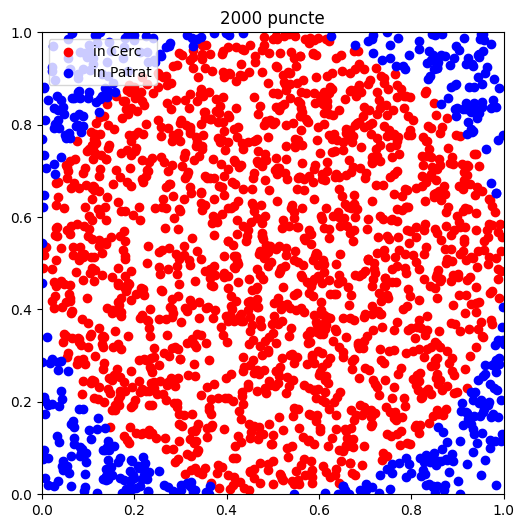

Frecventa relativa a punctelor:  0.7875
Frecventa relativa a punctelor teoretic:  0.7853981633974483
Diferenta:  0.002101836602551699


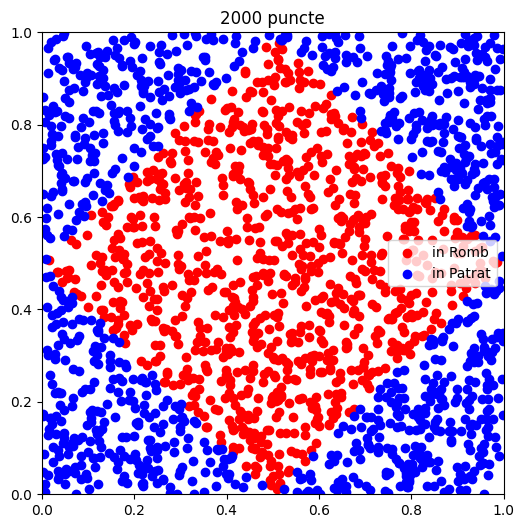

Frecventa relativa a punctelor:  0.48
Frecventa relativa a punctelor teoretic:  0.5
Diferenta:  0.020000000000000018


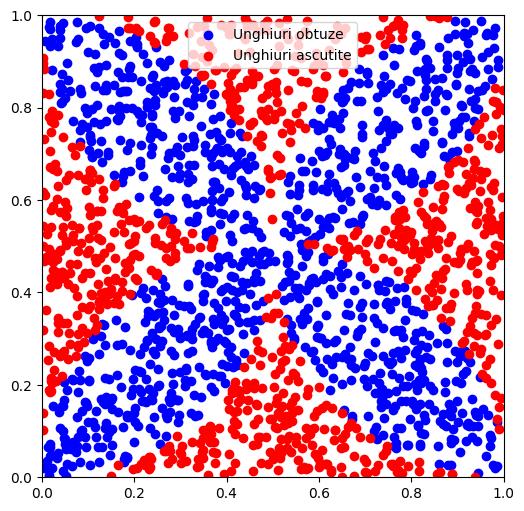

Frecventa relativa a punctelor:  0.5635
Frecventa relativa a punctelor teoretic:  0.5707963267948966
Diferenta:  0.007296326794896557


In [36]:
import matplotlib.pyplot as plt
import math
from random import uniform

def inCerc(x: float, y: float, raza: float):
    distanta = math.dist([x, y], [raza, raza]) # distanta euclidiana dintre punct si centrul patratului
    return distanta < raza

def cercPatrat(n: int):
    lungimeLatura = 1.0
    raza = lungimeLatura / 2
    puncteValide = 0
    
    # punctele din interior
    x_inside = []
    y_inside = []
    
    # punctele din exterior
    x_outside = []
    y_outside = []
    
    for _ in range(n):
        # generam puncte aleatoare
        x = uniform(0, 1)
        y = uniform(0, 1)
        
        if inCerc(x, y, raza):
            puncteValide += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)
    
    plt.figure(figsize=(6,6))
    plt.scatter(x_inside, y_inside, color='red', label='in Cerc')
    plt.scatter(x_outside, y_outside, color='blue', label='in Patrat')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title(str(n) + " puncte")
    
    plt.show()
    
    probabilityCerc = puncteValide / n
    probabilityCercTeoretic = math.pi / 4
    print("Frecventa relativa a punctelor: ", probabilityCerc)
    print("Frecventa relativa a punctelor teoretic: ", probabilityCercTeoretic)
    print("Diferenta: ", math.fabs(probabilityCercTeoretic - probabilityCerc))
    
def rombPatrat(n: int):
    lungimePatrat = 1.0
    centru = (lungimePatrat / 2, lungimePatrat / 2) # coordonatele centrului
    puncteValide = 0
    
    # punctele care respecta conditia
    x_inside = []
    y_inside = []
    
    # punctele care nu respecta conditia
    x_outside = []
    y_outside = []
    
    for _ in range(n):
        x = uniform(0, 1)
        y = uniform(0, 1)
        
        distCentru = math.dist([x, y], centru)
        distantaVarfuri = [math.dist([x,y], [0, 0]), math.dist([x, y], [0, 1]), math.dist([x, y], [1, 0]), math.dist([x, y], [1, 1])]
        
        if distCentru < min(distantaVarfuri):
            x_inside.append(x)
            y_inside.append(y)
            puncteValide += 1
        else:
            x_outside.append(x)
            y_outside.append(y)
            
    plt.figure(figsize=(6,6))
    plt.scatter(x_inside, y_inside, color='red', label='in Romb')
    plt.scatter(x_outside, y_outside, color='blue', label='in Patrat')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title(str(n) + " puncte")
    
    plt.show()
    
    probabilityRomb = puncteValide / n
    probabilityRombTeoretic = 1 / 2
    print("Frecventa relativa a punctelor: ", probabilityRomb)
    print("Frecventa relativa a punctelor teoretic: ", probabilityRombTeoretic)
    print("Diferenta: ", math.fabs(probabilityRombTeoretic - probabilityRomb))
           
def petale(n: int): 
    lungime = 1.0
    razaCerc = lungime / 2
    puncteValide = 0
    
    x_petala = []
    y_petala = []
    
    x_outside = []
    y_outside = []
    
    for _ in range(n):
        x = uniform(0, 1)
        y = uniform(0, 1)
        
        distante = [math.dist([x, y], [0, 0.5]), math.dist([x, y], [0.5, 0]), math.dist([x, y], [0.5, 1]), math.dist([x, y], [1, 0.5])]
        
        semicercComun = 0
        
        for distanta in distante:
            if distanta < razaCerc:
                semicercComun += 1
        if semicercComun >= 2:
            x_petala.append(x)
            y_petala.append(y)
            puncteValide += 1
        else:
            x_outside.append(x)
            y_outside.append(y)
    
    prob_petala = len(x_petala) / n
    prob_outside = len(y_petala) / n
    
    # Desenarea punctelor
    plt.figure(figsize=(6, 6))
    plt.scatter(x_petala, y_petala, color='blue', label='Unghiuri obtuze')
    plt.scatter(x_outside, y_outside, color='red', label='Unghiuri ascutite')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()
    
    probabilityPetale = puncteValide / n
    probabilityPetaleTeoretic = math.pi / 2 - 1
    print("Frecventa relativa a punctelor: ", probabilityPetale)
    print("Frecventa relativa a punctelor teoretic: ", probabilityPetaleTeoretic)
    print("Diferenta: ", math.fabs(probabilityPetaleTeoretic - probabilityPetale))
    
cercPatrat(2000)
rombPatrat(2000)
petale(2000)